In [2]:
# Introducing US Gun Deaths Data
import csv

f = open('guns.csv','r',encoding='utf-8')
data = list(csv.reader(f))

print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [3]:
# Removing Headers From A List Of Lists
headers = data[0]
data = data[1:]

print(headers)
print(data[:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [4]:
# Counting Gun Deaths By Year
years = [x[1] for x in data]
year_counts={}
for year in years:
    if year in year_counts:
        year_counts[year]+=1
    else:
        year_counts[year]= 1

print(year_counts)

{'2012': 33563, '2013': 33636, '2014': 33599}


In [5]:
# Exploring Gun Deaths By Month And Year
import datetime
dates = [datetime.datetime(year=int(x[1]), month=int(x[2]), day=1) for x in data]

date_counts={}
for date in dates:
    if date in date_counts:
        date_counts[date]+=1
    else:
        date_counts[date]=1
        
date_counts
sh={k: date_counts[k] for k in sorted(list(date_counts))[:4]}
sh

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795}

In [6]:
# Exploring Gun Deaths By Race And Sex
sex = [x[5] for x in data]
sex_counts ={}
for s in sex:
    if s in sex_counts:
        sex_counts[s]+=1
    else:
        sex_counts[s]=1
    
races = [x[7] for x in data]
race_counts={}
for r in races:
    if r in race_counts:
        race_counts[r]+=1
    else:
        race_counts[r]=1
     
print(sex_counts)
print(races)
print(race_counts)

{'M': 86349, 'F': 14449}
['Asian/Pacific Islander', 'White', 'White', 'White', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'White', 'Black', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'Asian/Pacific Islander', 'White', 'Native American/Native Alaskan', 'White', 'Black', 'White', 'White', 'White', 'Native American/Native Alaskan', 'White', 'White', 'White', 'Native American/Native Alaskan', 'White', 'Native American/Native Alaskan', 'White', 'White', 'White', 'Native American/Native Alaskan', 'Native American/Native Alaskan', 'White', 'White', 'Native American/Native Alaskan', 'Asian/Pacific Islander', 'White', 'Native American/Native Alaskan', 'Native American/Native Alaskan', 'White', 'White', 'White', 'Native American/Native Alaskan', 'Asian/Pacific Islander', 'White', 'White', 'Native American/Native Alaskan', 'Nat

Write a markdown cell detailing what you've learned so far, and what you think might need further examination.

Gun deaths in the US seem to disproportionately affect men vs women. They also seem to disproportionately affect minorities, although having some data on the percentage of each race in the overall US population would help.

There appears to be a minor seasonal correlation, with gun deaths peaking in the summer and declining in the winter. It might be useful to filter by intent, to see if different categories of intent have different correlations with season, race, or gender.

In [7]:
# Reading In A Second Dataset - census
census = list(csv.reader(open('census.csv','r')))

census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [8]:
# Computing Rates Of Gun Deaths Per Race
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

race_per_hundredk={}
for i in race_counts:
    if i in mapping:
        race_per_hundredk[i]=(race_counts[i]/mapping[i])*100000
    
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'White': 33.56849303419181,
 'Native American/Native Alaskan': 24.521955573811088,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907}

In [9]:
# Filtering By Intent - Homicide
homicide_races = [x[7] for x in data if x[3] == 'Homicide']
homicide_race_counts={}

for r in homicide_races:
    if r in homicide_race_counts:
        homicide_race_counts[r]+=1
    else:
        homicide_race_counts[r]=1

homicide_race_counts

# from solution 
# intents =[row[3] for row in data]
# homicide_race_counts  = {}
# for i,race in enumerate(races):
#     if race not in homicide_race_counts:
#         homicide_race_counts[race] = 0
#     if intents[i] == "Homicide":
#         homicide_race_counts[race] += 1

# homicide_race_counts

race_per_hundredk={}
for i in homicide_race_counts:
    if i in mapping:
        race_per_hundredk[i]=(homicide_race_counts[i]/mapping[i])*100000
    
race_per_hundredk

{'White': 4.6356417981453335,
 'Asian/Pacific Islander': 3.530346230970155,
 'Black': 48.471284987180944,
 'Native American/Native Alaskan': 8.717729026240365,
 'Hispanic': 12.627161104219914}

Findings
It appears that gun related homicides in the US disproportionately affect people in the Black and Hispanic racial categories.

Write up your findings in a markdown cell.

Write up any next steps you want to pursue with the data in a markdown cell.

In [10]:
# Next Steps
# Here are some potential next steps:
#  Figure out the link, if any, between month and homicide rate.
#  Explore the homicide rate by gender.
#  Explore the rates of other intents, like Accidental, by gender and race.
#  Find out if gun death rates correlate to location and education.

# Using Pandas and Matplotlib

In [11]:
import pandas as pd
df = pd.read_csv('guns.csv')
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


Text(0.5,1,'Homicide rate by month')

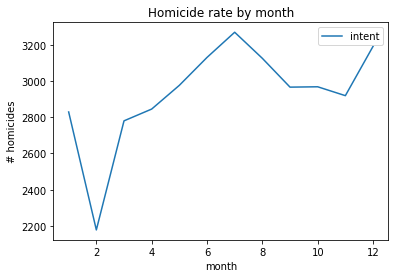

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#  Figure out the link, if any, between month and homicide rate.
homicides = df[df['intent'] == 'Homicide']
homicides.groupby('month')[['intent']].count().plot()
plt.ylabel('# homicides')
plt.title('Homicide rate by month')

In [13]:
# Homicides are low in winter, the lowets being Feb. Seems to be high in Summer peaking in July

Text(0.5,1,'Homicide rate by gender')

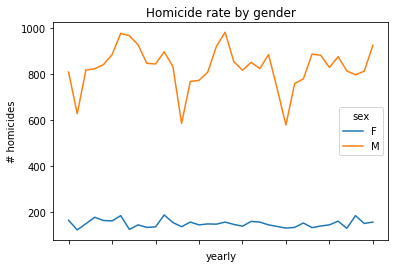

In [19]:
#  Explore the homicide rate by gender.
homicides.pivot_table('intent', index=['year','month'], columns='sex', aggfunc='count').plot()
plt.ylabel('# homicides')
plt.xlabel('yearly')
plt.title('Homicide rate by gender')